<a href="https://colab.research.google.com/github/Divya-Rag/Traffic-Accident-Analysis/blob/main/Traffic_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

*Load and Prepare the Data*

In [2]:
df = pd.read_csv("AccidentsBig.csv", low_memory=False)
df = df[df['Time'].notnull()]
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df = df.dropna(subset=['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Weekday'] = df['DateTime'].dt.day_name()
df[['Date', 'Time', 'DateTime', 'Hour', 'Weekday']].head()

/tmp/ipython-input-2-1997244006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['DateTime'].dt.hour
/tmp/ipython-input-2-1997244006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['DateTime'].dt.day_name()


,Date,Time,DateTime,Hour,Weekday
0,04-01-2018,17:42,2018-04-01 17:42:00,17,Sunday
1,05-01-2018,17:36,2018-05-01 17:36:00,17,Tuesday
2,06-01-2018,00:15,2018-06-01 00:15:00,0,Friday
3,07-01-2018,10:35,2018-07-01 10:35:00,10,Sunday
4,10-01-2018,21:13,2018-10-01 21:13:00,21,Monday


*Accidents by Hour of Day*

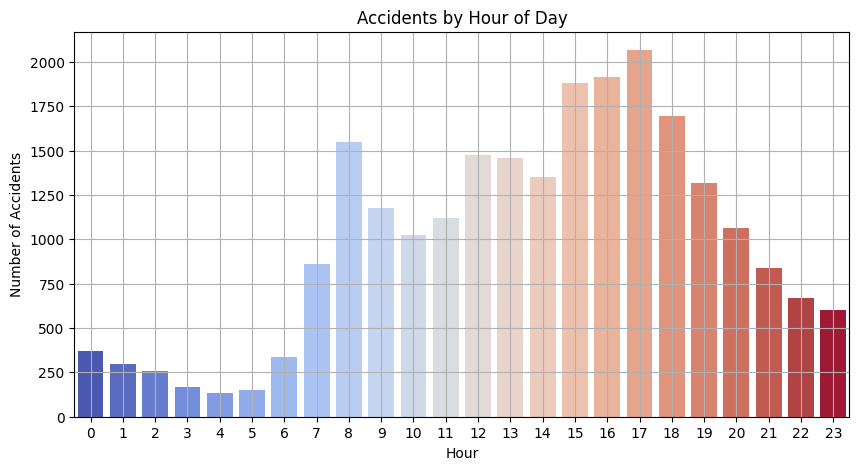

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette='coolwarm', hue='Hour', legend=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

The analysis shows clear time-based patterns in road accidents:


*   Morning Spike around 8PM corresponds to school and office rush hours.
*   Evening peak between 3Pm and 6Pm(15:00-18:00) is likely due to end-of-day traffic, increased fatigue, and high vehicle volume.
*  Minimal activity between 2AM to 5AM, as expected with lower traffic at night.

These insights highlight the importance of increased road safety measures during peak commuting hours to reduce the risk of accidents.



*Accidents by Weekday*

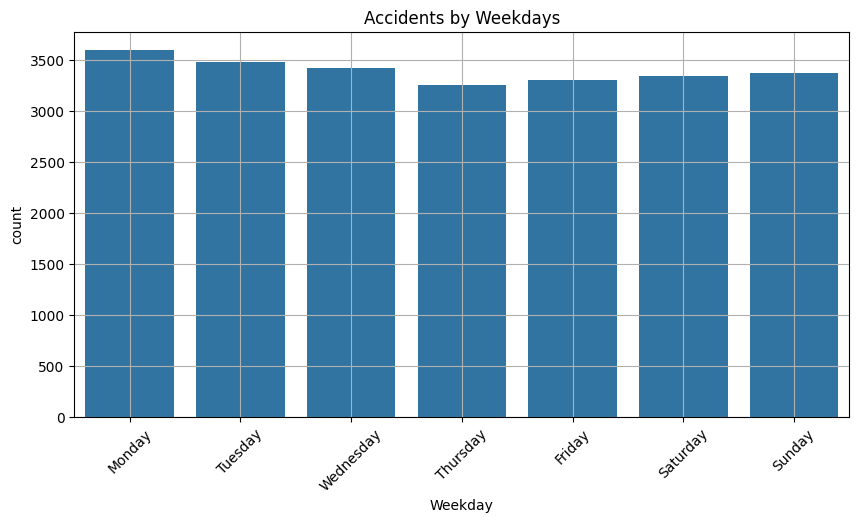

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Weekdays')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Weekday vs. Weekend – Which is Riskier?
Based on the data:

* **Weekdays (Monday to Friday)** show a consistently higher number of accidents, especially on Monday, Tuesday, and Wednesday.
*  Surprisingly, **Thursday** has the **lowest number of accidents**, which
might be due to less road congestion or more stable commuting patterns.
* **Weekends (Saturday and Sunday)** have fewer accidents in comparison, though they still show significant numbers due to leisure and non-routine travel.

**Conclusion:**

**Weekdays are riskier** for road travel in terms of accident frequency. This may be due to daily commuting, work-related stress, and congested traffic during peak hours.







*Weather and Light Condition Analysis*

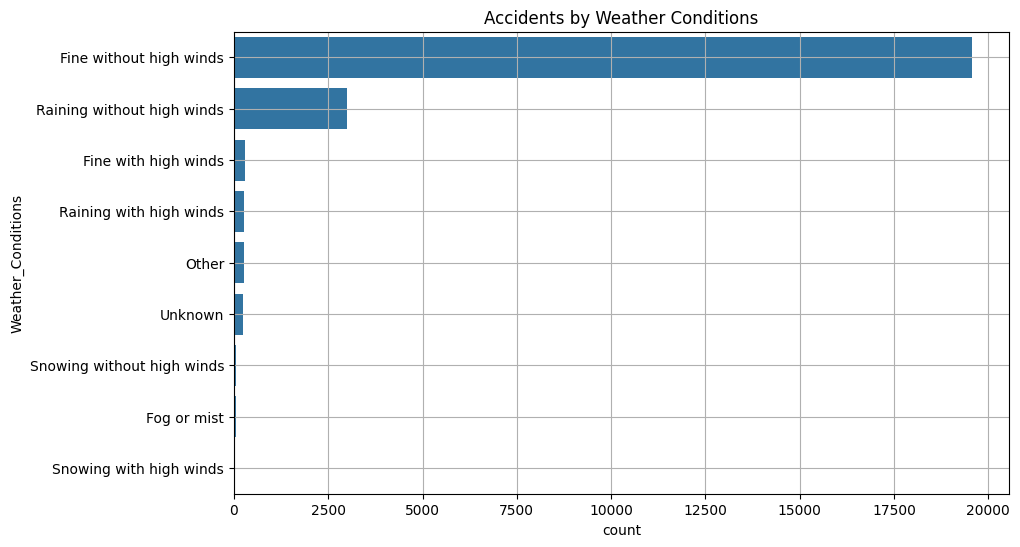

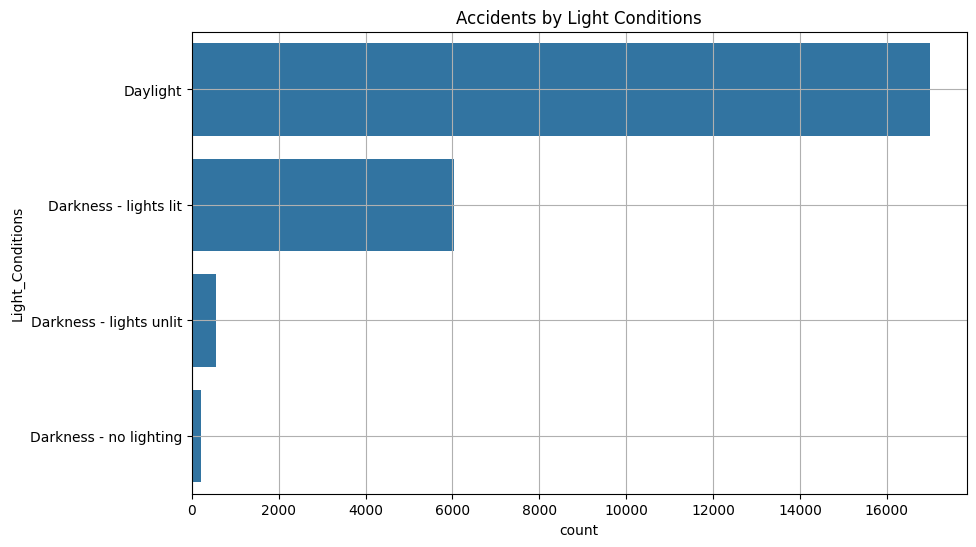

In [5]:
weather_mapping = {
    1.0: 'Fine without high winds',
    2.0: 'Raining without high winds',
    3.0: 'Snowing without high winds',
    4.0: 'Fine with high winds',
    5.0: 'Raining with high winds',
    6.0: 'Snowing with high winds',
    7.0: 'Fog or mist',
    8.0: 'Other',
    9.0: 'Unknown'
}
df['Weather_Conditions']=df['Weather_Conditions'].map(weather_mapping)
plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.grid(True)
plt.show()

light_mapping = {
    1.0: 'Daylight',
    4.0: 'Darkness - lights lit',
    5.0: 'Darkness - no lighting',
    6.0: 'Darkness - lights unlit',
    7.0: 'Darkness - no lighting',
}
df['Light_Conditions'] = df['Light_Conditions'].map(light_mapping)
plt.figure(figsize=(10, 6))
sns.countplot(y='Light_Conditions', data=df, order=df['Light_Conditions'].value_counts().index)
plt.title("Accidents by Light Conditions")
plt.grid(True)
plt.show()



*   **Most accidents** occur during **fine weather with no high winds**, indicating driver behavior matters more than bad weather.
*   **Darkness with street lights** is the most common light condition for accidents, showing visibility alone doesn't prevent accidents.
*   Accidents also occur significantly during **daylight**, highlighting the need for cautious driving at all times.





*Accidents Severity by Hour*

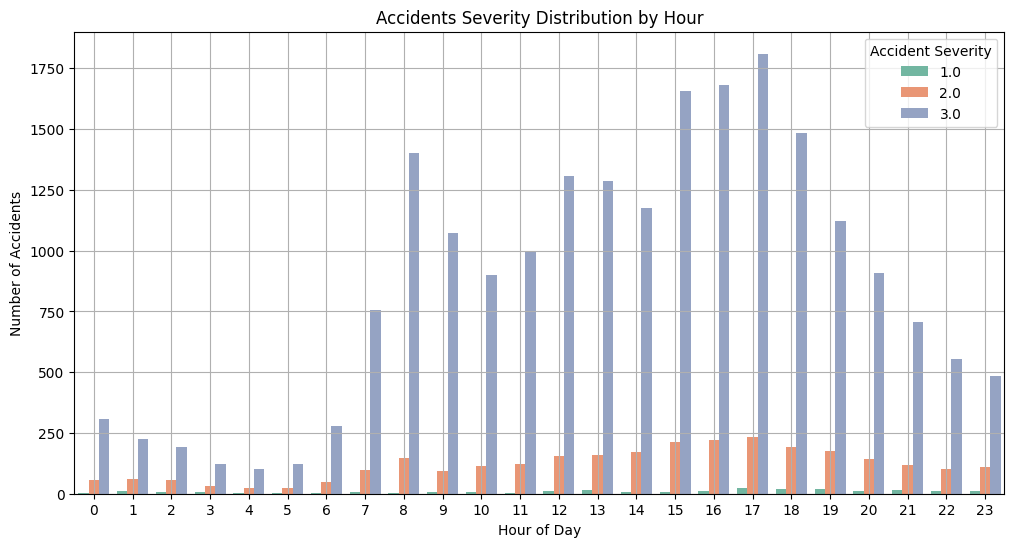

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Accident_Severity', data=df, palette='Set2')
plt.title('Accidents Severity Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.grid(True)
plt.show()

**Figure:** This chart shows how road accidents happen at different times of the day, divided by severity. **Most accidents are of low severity and occur during busy hours**(especially between 3PM and 6PM), likely due to heavy traffic. Serious accidents are fewer and mostly happen late at night or early morning, possibly because of speeding or poor visibility.

*Visualize Hotspots on a Map*

In [29]:
df_map = df[['latitude', 'longitude']].dropna()
m = folium.Map(location=[df_map.latitude.mean(), df_map.longitude.mean()], zoom_start=6, tiles="CartoDB positron")
HeatMap(data=df_map.values, radius =10, blur=15, min_opacity=0.3, max_zoom=8).add_to(m)
m



*   **High accident hotspots** are visible in urban regions like **Mumbai, Delhi-NCR, Hyderabad**, and **Kolkata**.

*   **Rural and remote areas** show lower density, indicating fewer reported incidents or traffic flow.
*   The map highlights regions where **road safety measures** and **infrastructure improvements** should be prioritized.

*   The visualization can assist in **policy-making, resource allocation**, and **public safety planning**.

